<a href="https://colab.research.google.com/github/cauancalmeida/Data_Science_studies/blob/main/Analisando_e_Prevendo_series_temporais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Importando os dados**

> Você pode checar a documentação da biblioteca Pandas [aqui](https://pandas.pydata.org/).

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv')

In [ ]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


###**Tratando dados nulos**

In [ ]:
df.shape

(17429, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum()

,0
data_hora,0
contagem,0
temperatura,23
sensacao_termica,23
umidade,0
velocidade_vento,0
clima,0
feriado,0
fim_de_semana,0
estacao,0


>Você pode encontrar informações detalhadas sobre o método *interpolate()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html).

In [111]:
df['temperatura'] = df['temperatura'].interpolate(method='linear')
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method='linear')

In [ ]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


###**Identificando e removendo dados duplicados**

In [112]:
df.duplicated().sum()

15

In [113]:
# Identificando as linhas duplicadas no DataFrame
duplicatas = df.duplicated(keep=False)

# Selecionando as linhas duplicadas com base no resultado anterior
linhas_duplicadas = df[duplicatas]

# Ordenando as linhas duplicadas pela coluna 'data_hora'
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


>Você pode encontrar informações detalhadas sobre o método *drop_duplicates()* da biblioteca Pandas [aqui](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html).

In [114]:
#removendo as linhas duplicadas
df_limpo = df.drop_duplicates()

In [ ]:
#verificando o tamanho do df limpo
df_limpo.shape

(17414, 10)

##Analise descritiva

In [ ]:
#vizualiando as medidas descritivas do DF
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


###**Analisando as distribuições**

In [ ]:
#importando as bibliotecas graficas
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-15-e332c52d5a11>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.temperatura, bins=15)


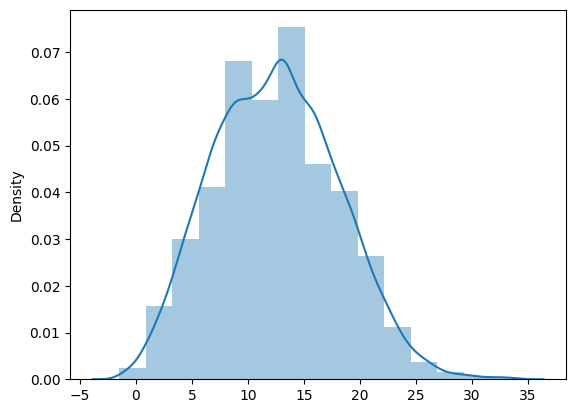

In [ ]:
#histograma da temperatura
sns.distplot(df_limpo, x=df_limpo.temperatura, bins=15)
plt.show()

<ipython-input-16-40694c88bf75>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.sensacao_termica, bins=15)


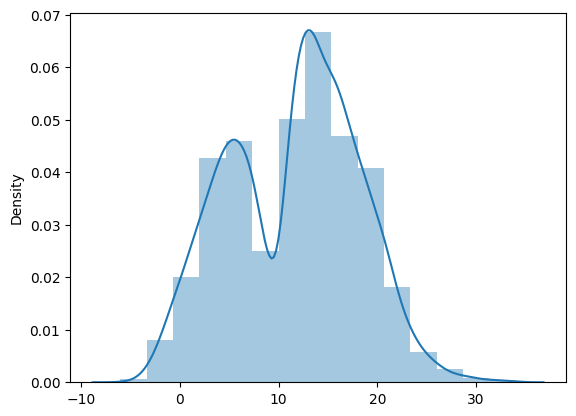

In [ ]:
#histograma da sensação termica
sns.distplot(df_limpo, x=df_limpo.sensacao_termica, bins=15)
plt.show()

<ipython-input-17-79c6bc0f2047>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.umidade, bins=15)


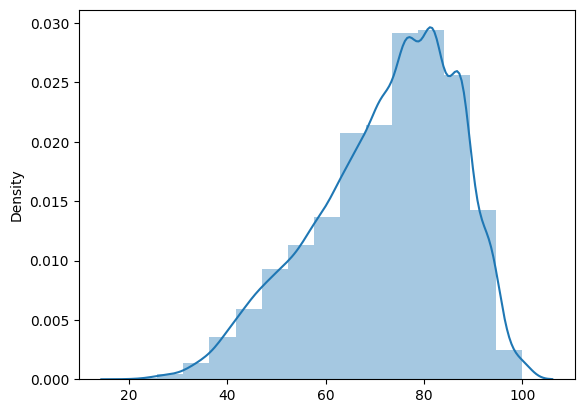

In [ ]:
#histograma da umidade
sns.distplot(df_limpo, x=df_limpo.umidade, bins=15)
plt.show()

<ipython-input-18-24e0969c3390>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_limpo, x=df_limpo.velocidade_vento, bins=15)


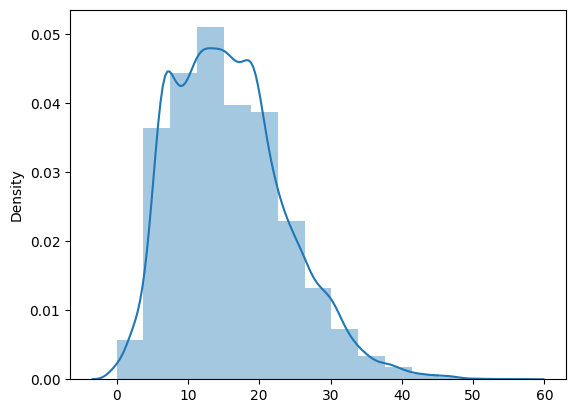

In [ ]:
#histograma da velocidade do vento
sns.distplot(df_limpo, x=df_limpo.velocidade_vento, bins=15)
plt.show()

###**Investigando relações entre variáveis**

**Prompt:** Crie 4 gráficos do tipo scatterplot das variáveis temperatura, sensacao_termica, umidade, velocidade_vento com a coluna contagem no eixo y. deixar os gráficos na posição 2X2. Cada gráfico deve ter um título.

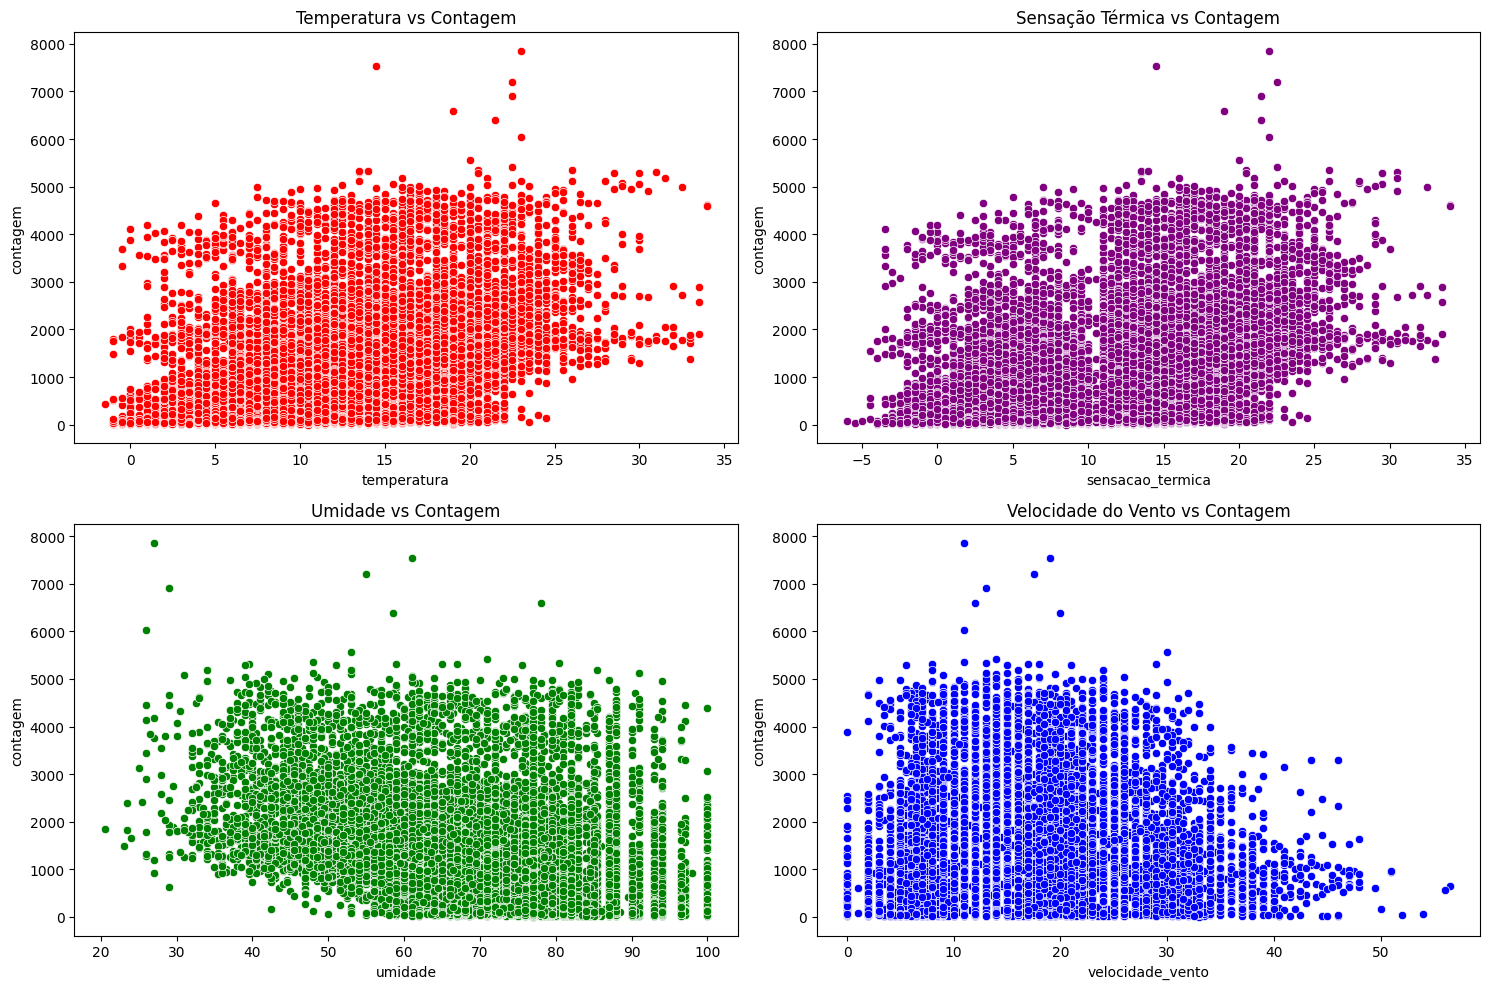

In [ ]:
# Criando as figuras
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plotando os graficos
sns.scatterplot(ax=axes[0, 0], data=df_limpo, x='temperatura', y='contagem',color='red')
axes[0, 0].set_title('Temperatura vs Contagem')
sns.scatterplot(ax=axes[0, 1], data=df_limpo, x='sensacao_termica', y='contagem',color='purple')
axes[0, 1].set_title('Sensação Térmica vs Contagem')
sns.scatterplot(ax=axes[1, 0], data=df_limpo, x='umidade', y='contagem',color='green')
axes[1, 0].set_title('Umidade vs Contagem')
sns.scatterplot(ax=axes[1, 1], data=df_limpo, x='velocidade_vento', y='contagem',color='blue')
axes[1, 1].set_title('Velocidade do Vento vs Contagem')

# Ajustando o layout e exubindo os graficos
plt.tight_layout()
plt.show()

###**Examinando a correlação entre as variáveis**

Correlação é uma medida estatística que descreve a relação entre duas variáveis. Existem diferentes tipos de correlação, mas a correlação de Pearson é uma das mais comuns. A correlação de Pearson mede a força e a direção de uma relação linear entre duas variáveis. Ela produz um valor de correlação que varia de -1 a 1.

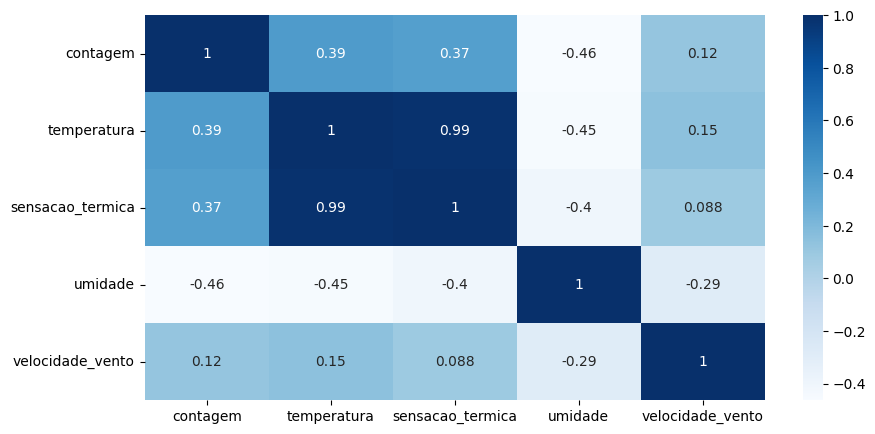

In [ ]:
#grafico de calor para verificar a correlação entre as variaveis
plt.figure(figsize=(10, 5))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()

In [ ]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [115]:
for col in df_limpo.columns:
  if df_limpo[col].dtype == 'category':
    print(f'Coluna: {col}')
    print(df_limpo[col].unique())
    print('='*15, '\n')

###**Comparando dias normais, feriados e finais de semana**

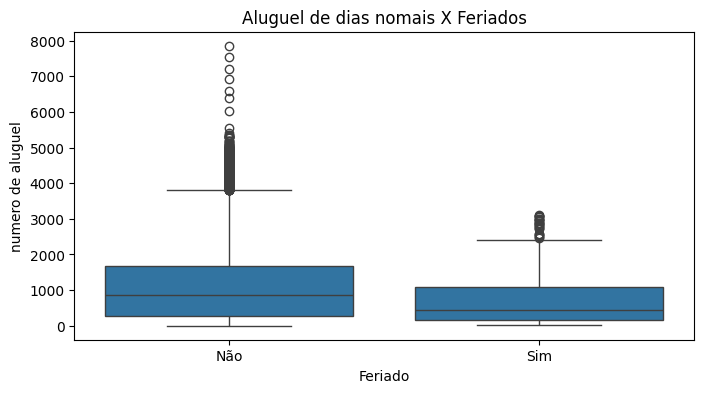

In [ ]:
# Dias normais vs feriados
plt.figure (figsize =(8,4))

sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguel de dias nomais X Feriados')
plt.xlabel("Feriado")
plt.ylabel("numero de aluguel")
plt.show()

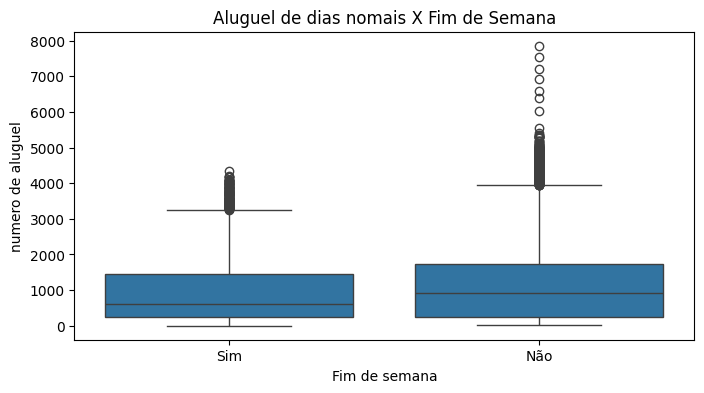

In [ ]:
# Dias normais vs finais de semana
plt.figure (figsize =(8,4))

sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguel de dias nomais X Fim de Semana')
plt.xlabel("Fim de semana")
plt.ylabel("numero de aluguel")
plt.show()

In [ ]:
# Obtendo as medianas
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fds = df_limpo.groupby('fim_de_semana')['contagem'].median()

In [ ]:
mediana_feriado

,contagem
feriado,
Não,855.0
Sim,439.5


In [ ]:
mediana_fds

,contagem
fim_de_semana,
Não,927.0
Sim,619.0


###**Investigando como o clima afeta a demanda**

In [ ]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index()
df_clima = df_clima.sort_values(by='contagem', ascending = False)
df_clima

,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


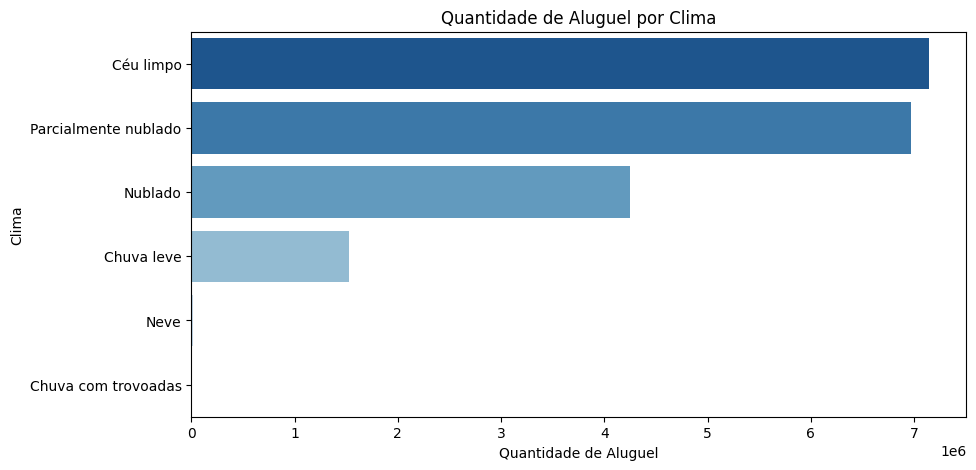

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(x='contagem', y='clima', data=df_clima, hue='clima', palette='Blues_r', orient='h')
plt.title('Quantidade de Aluguel por Clima')
plt.xlabel('Quantidade de Aluguel')
plt.ylabel('Clima')
plt.show()

###**Analisando as distribuições por estação**

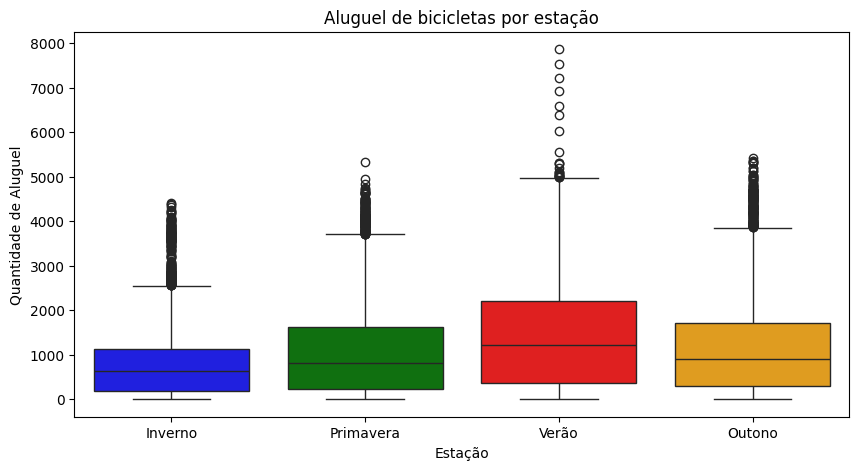

In [ ]:
plt.figure(figsize=(10, 5))
paleta_cores= {'Primavera': 'green', 'Verão': 'red', 'Outono': 'orange', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette= paleta_cores)
plt.title('Aluguel de bicicletas por estação')
plt.xlabel('Estação')
plt.ylabel('Quantidade de Aluguel')
plt.show()

In [ ]:
df_limpo.groupby('estacao')['contagem'].median()

,contagem
estacao,
Inverno,632.0
Outono,898.0
Primavera,823.0
Verão,1214.0


Formulando as hipóteses:

$H_0:$ As distribuições são iguais.\
$H_1:$ As distribuições são diferentes.

In [116]:
from scipy.stats import mannwhitneyu
# Filtrando os dados da primavera e outono
primavera = df_limpo[df_limpo['estacao'] == 'Primavera']['contagem']
outrono = df_limpo[df_limpo['estacao'] == 'Outono']['contagem']
# Aplicando o teste de Mann-Whitney
stat, p = mannwhitneyu(primavera, outrono, alternative='two-sided')
stat, p

(9044682.5, 0.0004762100221646296)

O *p value* menor que 0.05 sugere que os resultados observados são improváveis de ocorrerem apenas por acaso. Portanto, rejeitamos a hipótese nula em favor da hipótese alternativa, concluindo que há evidências estatisticamente significativas para suportar a hipótese alternativa.

###**Convertendo tipos de dados**

In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.5+ MB


In [ ]:
# Convertendo a coluna data_hora para o formato datetime:
df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])

<ipython-input-34-8aa1c8d22bc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['data_hora'] = pd.to_datetime(df_limpo['data_hora'])


In [ ]:
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
# Criando novas colunas: mes e horario
df_limpo['mes'] = df_limpo['data_hora'].dt.month
df_limpo['horario'] = df_limpo['data_hora'].dt.hour

<ipython-input-37-9278924eefb6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['mes'] = df_limpo['data_hora'].dt.month
<ipython-input-37-9278924eefb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['horario'] = df_limpo['data_hora'].dt.hour


In [ ]:
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
# Retirando o horário da coluna data_hora
df_limpo['data_hora'] = df_limpo['data_hora'].dt.date

<ipython-input-39-13e1ab8dcc65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['data_hora'] = df_limpo['data_hora'].dt.date


In [ ]:
df_limpo.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
# Renomeando a coluna data_hora para data:
df_limpo=df_limpo.rename(columns={'data_hora':'data'})
df_limpo.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
# Convertendo a coluna data para o formato datetime:
df_limpo['data'] = pd.to_datetime(df_limpo['data'])

###**Analisando a demanda por horário**

In [ ]:
df_hora = df_limpo.groupby('horario')['contagem'].sum().reset_index()
df_hora = df_hora.sort_values(by='contagem', ascending = False)
df_hora

,horario,contagem
8,8,2087164
17,17,2059938
18,18,1913944
16,16,1364955
9,9,1201745
19,19,1200648
15,15,1140609
13,13,1096178
14,14,1071619
7,7,1066309


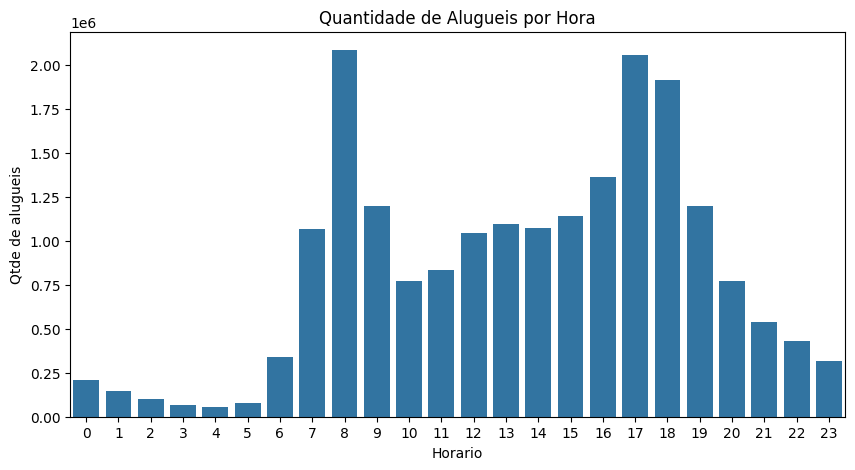

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y='contagem', x='horario', data=df_hora)
plt.title('Quantidade de Alugueis por Hora')
plt.xlabel('Horario')
plt.ylabel('Qtde de alugueis')
plt.show()

In [ ]:
# Analisando os finais de semana
df_fds = df_limpo[df_limpo['fim_de_semana'] == 'Sim']
aluguel_fds = df_fds.groupby('horario')['contagem'].sum().reset_index()


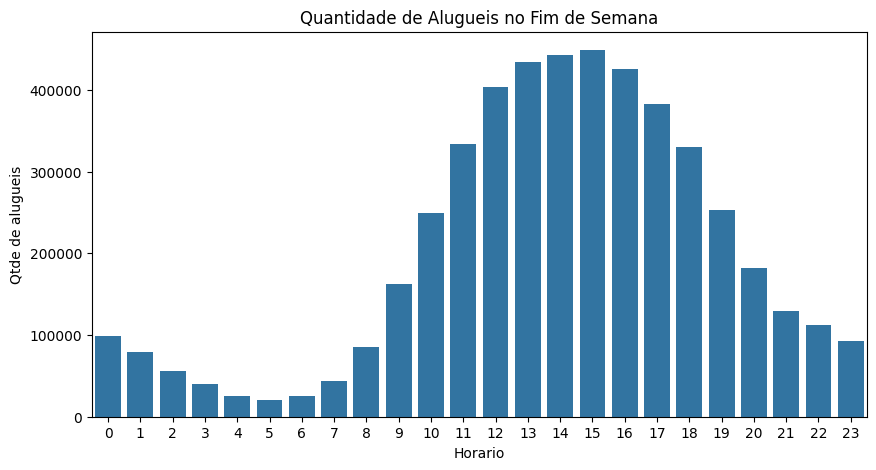

In [ ]:

plt.figure(figsize=(10, 5))
sns.barplot(y='contagem', x='horario', data=aluguel_fds)
plt.title('Quantidade de Alugueis no Fim de Semana')
plt.xlabel('Horario')
plt.ylabel('Qtde de alugueis')
plt.show()

In [ ]:
# Analisando os feriados
df_feriado = df_limpo[df_limpo['feriado'] == 'Sim']
aluguel_feriado = df_fds.groupby('horario')['contagem'].sum().reset_index()

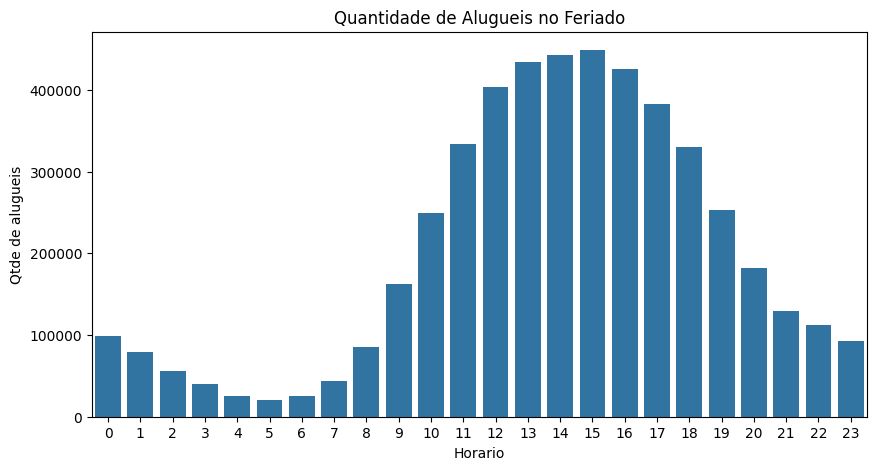

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(y='contagem', x='horario', data=aluguel_feriado)
plt.title('Quantidade de Alugueis no Feriado')
plt.xlabel('Horario')
plt.ylabel('Qtde de alugueis')
plt.show()

###**Analisando a demanda por dia e mês**

In [ ]:
df_data = df_limpo.groupby('data')['contagem'].sum().reset_index()
df_data

,data,contagem
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


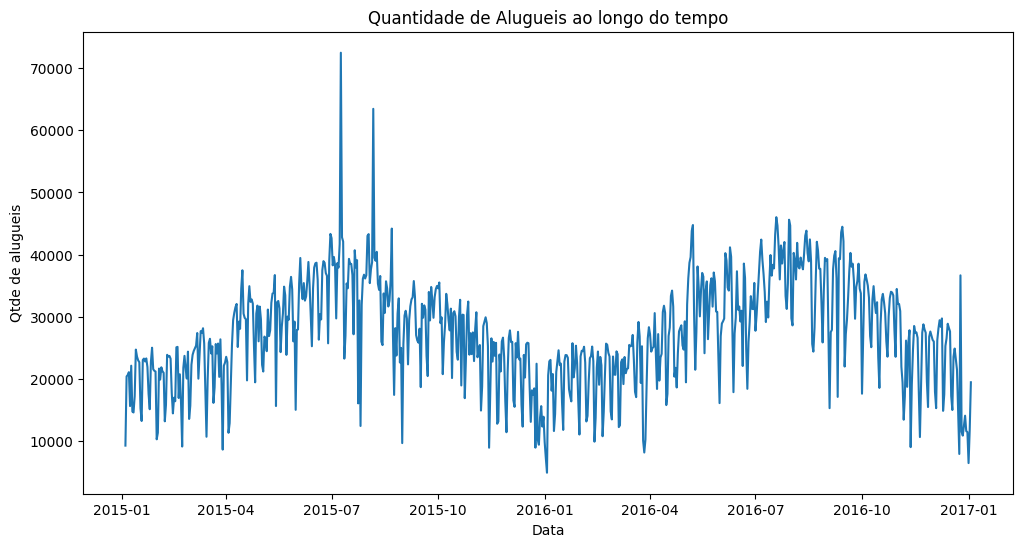

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='data', y='contagem', data=df_data)
plt.title('Quantidade de Alugueis ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Qtde de alugueis')
plt.show()

In [ ]:
aluguel_mes = df_limpo.groupby('mes')['contagem'].sum().reset_index()
aluguel_mes

,mes,contagem
0,1,1166837
1,2,1136504
2,3,1352461
3,4,1600427
4,5,1897348
5,6,1967130
6,7,2286214
7,8,2171265
8,9,1891097
9,10,1800752


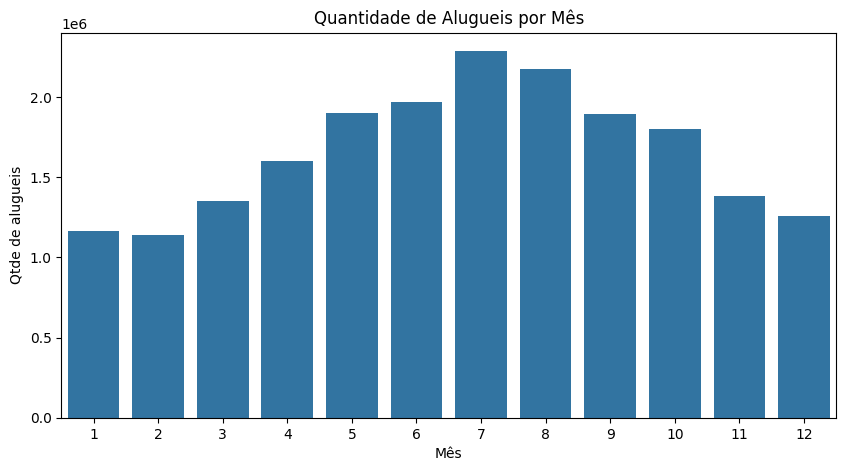

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='mes', y='contagem', data=aluguel_mes)
plt.title('Quantidade de Alugueis por Mês')
plt.xlabel('Mês')
plt.ylabel('Qtde de alugueis')
plt.show()

In [ ]:
df_media_mes= df_data.groupby(df_data['data'].dt.to_period('M'))['contagem'].mean().reset_index()
df_media_mes

,data,contagem
0,2015-01,19522.821429
1,2015-02,19414.071429
2,2015-03,22449.483871
3,2015-04,27719.400000
4,2015-05,28884.290323
5,2015-06,34441.733333
6,2015-07,36151.193548
7,2015-08,33353.258065
8,2015-09,29749.266667
9,2015-10,27904.709677


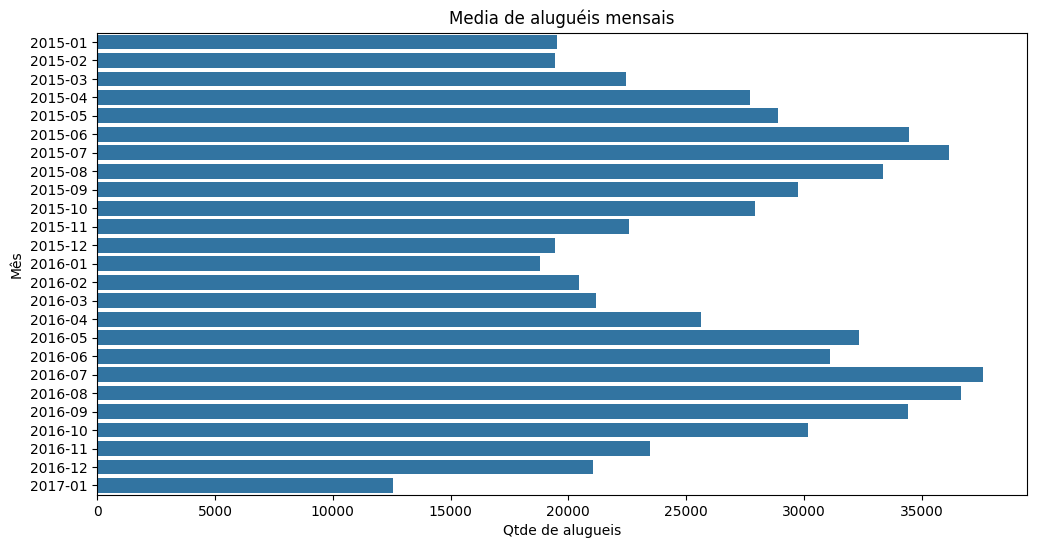

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(y='data', x='contagem', data=df_media_mes, orient='h')
plt.title('Media de aluguéis mensais')
plt.ylabel('Mês')
plt.xlabel('Qtde de alugueis')
plt.show()

### Previsões usando Prophet
Prophet é uma biblioteca desenvolvida pela Meta que permite a previsão de séries temporais.
Mais informações na documentação: [Prophet](https://facebook.github.io/prophet/)

In [ ]:
from prophet import Prophet #importanto Prophet

In [ ]:
df_prophet = df_limpo[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'}) #filtro das datas e contagem das bicicletas e renomeio das colunas para melhor interpretação do Prophet.
df_prophet.head()

,ds,y
0,2015-01-04,182
1,2015-01-04,138
2,2015-01-04,134
3,2015-01-04,72
4,2015-01-04,47


In [ ]:
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index() #removendo datas duplicadas
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
# Definindo um seed para garantir a reprodutibilidade
import numpy as np
np.random.seed(4587)

In [ ]:
#instanciando o modelo Prophet
modelo = Prophet()
#treinando modelo
modelo.fit(df_prophet)
#criando DF para previsões futuras
futuro = modelo.make_future_dataframe(periods=90,freq='D')
#realizando a previsão
previsoes = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/xucoac6m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/fhr3dnm0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18044', 'data', 'file=/tmp/tmpo44iwjzg/xucoac6m.json', 'init=/tmp/tmpo44iwjzg/fhr3dnm0.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_modelekcr1hur/prophet_model-20240920172003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


###**Explorando os resultados da previsão**

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


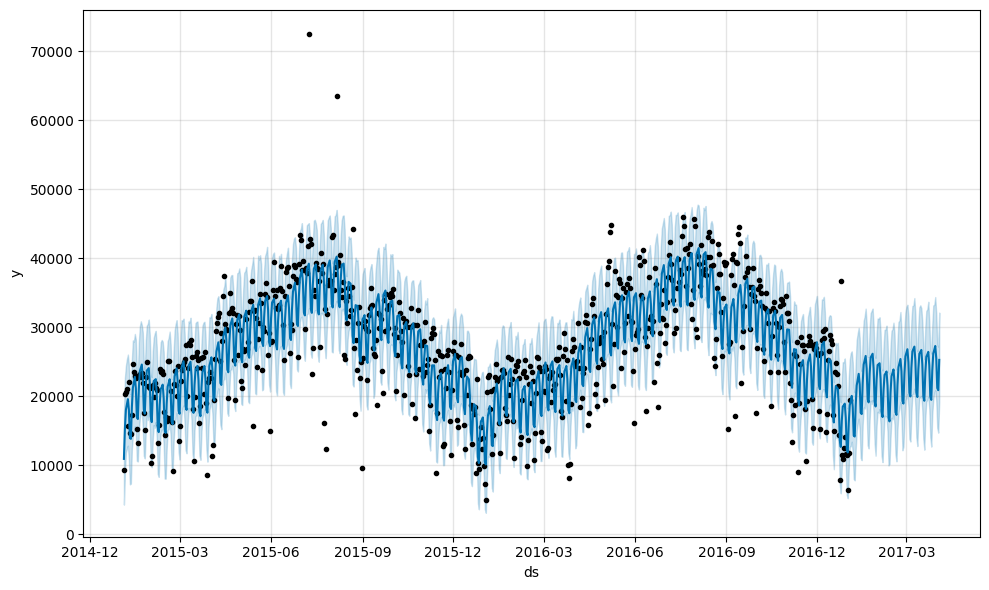

In [ ]:
#visualizando o resultado da previsão
fig1 = modelo.plot(previsoes)

In [ ]:
#valores previstos
previsoes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4272.992256,17164.501687
1,2015-01-05,15311.232708,8913.287413,22636.582586
2,2015-01-06,18014.350866,11829.942639,24414.201504
3,2015-01-07,18744.719144,12344.154062,25364.884607
4,2015-01-08,19556.191727,12809.812197,26023.639264
...,...,...,...,...
815,2017-03-30,27262.740955,20840.917738,34360.842038
816,2017-03-31,25490.750990,19305.507172,31997.954460
817,2017-04-01,21173.750109,15400.577315,27665.232260
818,2017-04-02,20856.740496,14700.917577,27176.730648


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

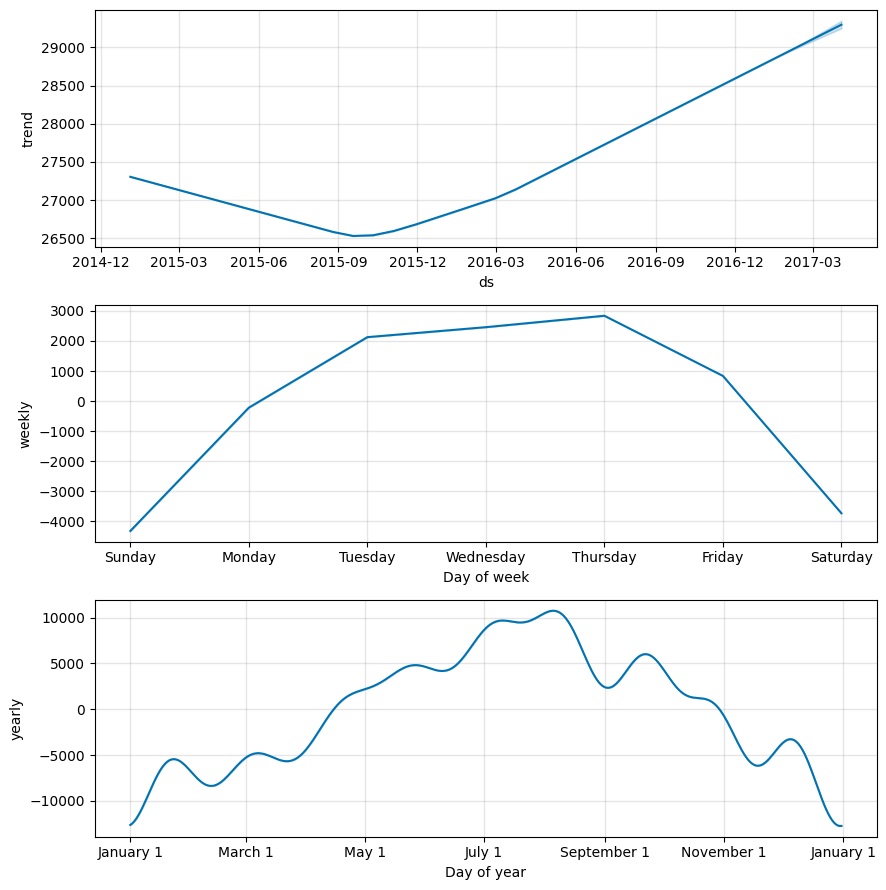

In [ ]:
#visualizando os componentes da previsão
fig2 = modelo.plot_components(previsoes)

A biblioteca Prophet usa um modelo aditivo que inclui componentes sazonais e de tendência. A equação utilizada pelo Prophet para realizar previsões pode ser representada da seguinte forma:

$y(t) = g(t) + s(t) + h(t) + \epsilon_t$

Onde:

- $ y(t)$ é o valor observado na série temporal no tempo \( t \).
- $ g(t) $ é a componente de tendência que modela mudanças de longo prazo.
- $ s(t) $ é a componente sazonal que modela padrões periódicos ou sazonais.
- $ h(t) $ é a componente de efeito de feriados
- $\epsilon_t$ é o erro aleatório na previsão.

Cada uma dessas componentes é modelada separadamente. A componente de tendência, $ g(t)$, é frequentemente modelada como uma função logística ou polinomial. A componente sazonal, $s(t)$, é modelada usando a análise de Fourier para capturar padrões periódicos. A componente de feriado, $h(t)$, é modelada como um efeito aditivo para cada feriado especificado.

Portanto, a equação completa usada pelo Prophet para realizar previsões é uma soma desses componentes mais o erro aleatório.

> Embora em nosso projeto não tenhamos detalhado a inclusão dos feriados no modelo, é importante ressaltar que essa possibilidade existe.


###**Separando os dados em treino e teste**

Separar os dados em conjuntos de treino e teste é fundamental em modelos de série temporal para avaliar a capacidade de generalização do modelo. Imagine que você está treinando um modelo para prever o número de vendas de uma empresa. Se você treinar o modelo com todos os dados disponíveis e depois testá-lo com os mesmos dados, ele pode parecer ótimo, mas na prática pode falhar em prever o futuro.

Isso acontece porque o modelo pode simplesmente memorizar os padrões específicos dos dados de treinamento, sem realmente aprender a identificar padrões gerais que se aplicam a novos dados. Ao separar os dados em treino e teste, você simula o cenário de previsão futura, garantindo que o modelo seja avaliado em sua capacidade de generalização, ou seja, em sua habilidade de fazer previsões precisas em dados que nunca viu antes. Isso ajuda a garantir que o modelo seja robusto e confiável quando usado para fazer previsões no mundo real.

In [ ]:
#visualizando o tamanho do df para separação entre treino e teste
df_prophet.shape

(730, 2)

In [ ]:
df_treino = pd.DataFrame()

In [ ]:
#separando 80% dos dados para treino
df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]

In [ ]:
#separando 20% para teste
df_teste = pd.DataFrame()
df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [ ]:
np.random.seed(4587)

In [ ]:
#treinando modelo com dados de treino
modelo=Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150,freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/j1hz4cvs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/d2z3w_dx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78591', 'data', 'file=/tmp/tmpo44iwjzg/j1hz4cvs.json', 'init=/tmp/tmpo44iwjzg/d2z3w_dx.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_model3__l4n54/prophet_model-20240920172010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


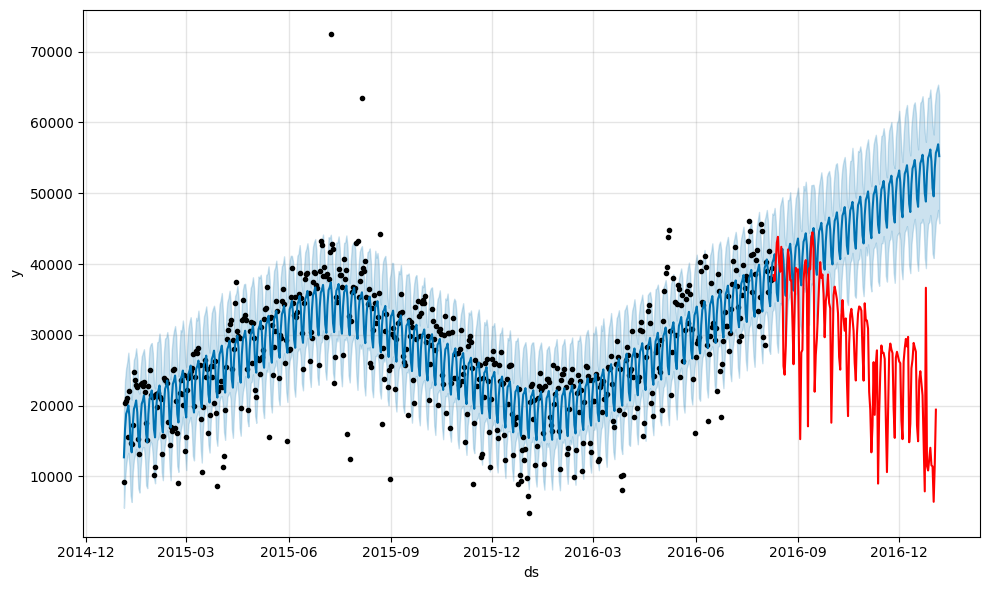

In [ ]:
#analise da previsão do modelo
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], color='red')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


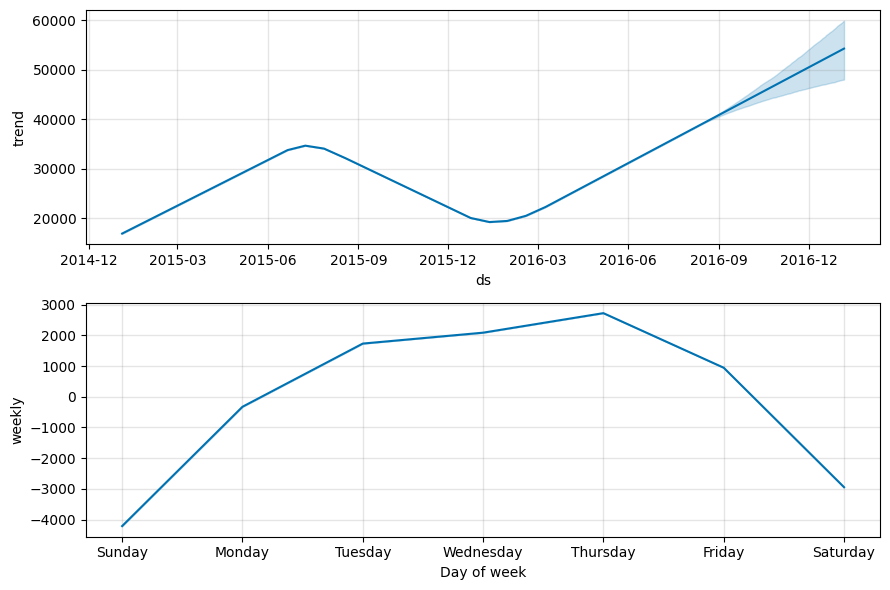

In [ ]:
#verificando os componentes para entender o erro do modelo
fig2 = modelo.plot_components(previsao)

Foi observado que a tendência da previsão é seguir apenas para cima, não acompanhando a característica sazonal dos dados.

###**Obtendo métricas**

In [ ]:
#metrificando os resultados da previsão
df_previsao = previsao[['ds','yhat']]
#df de comparação entre o previsto e os resultados reais
df_compara = pd.merge(df_previsao, df_teste, on='ds')
df_compara

,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


A métrica MSE *(Mean Squared Error)* é uma medida comum de avaliação de desempenho para modelos de regressão e previsão. Ela calcula a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados nos dados de teste. Matematicamente, o MSE é calculado pela fórmula:

$MSE = \frac{\sum_{} (y_i - \hat{y}_i)^2}{n}$

No entanto, o MSE tem uma limitação: suas unidades são quadráticas em relação às unidades originais dos dados. Isso pode tornar difícil interpretar o seu valor
Para superar essa limitação, muitas vezes é preferível usar o RMSE *(Root Mean Squared Error)*. O RMSE é simplesmente a raiz quadrada do MSE e é calculado pela fórmula:

$RMSE = \sqrt{MSE}$


formula do erro médio:


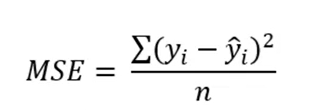

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculando métricas de erro
mse = mean_squared_error(df_compara['y'], df_compara['yhat'])
rmse = np.sqrt(mse)
print(f'mse = {mse} , rmse = {rmse}')


mse = 466132050.6184666 , rmse = 21590.09149166503


Foram obtidos valores muito altos de MSE e RMSE, o que indica um péssimo desempenho do modelo.

##**Melhorando o Modelo**

###**Ajustando os dados**

In [ ]:
np.random.seed(4587)
modelo=Prophet(yearly_seasonality=True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=150,freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/qsrxew8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/8f3gpto5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85445', 'data', 'file=/tmp/tmpo44iwjzg/qsrxew8q.json', 'init=/tmp/tmpo44iwjzg/8f3gpto5.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_modelaylys1q4/prophet_model-20240920172011.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


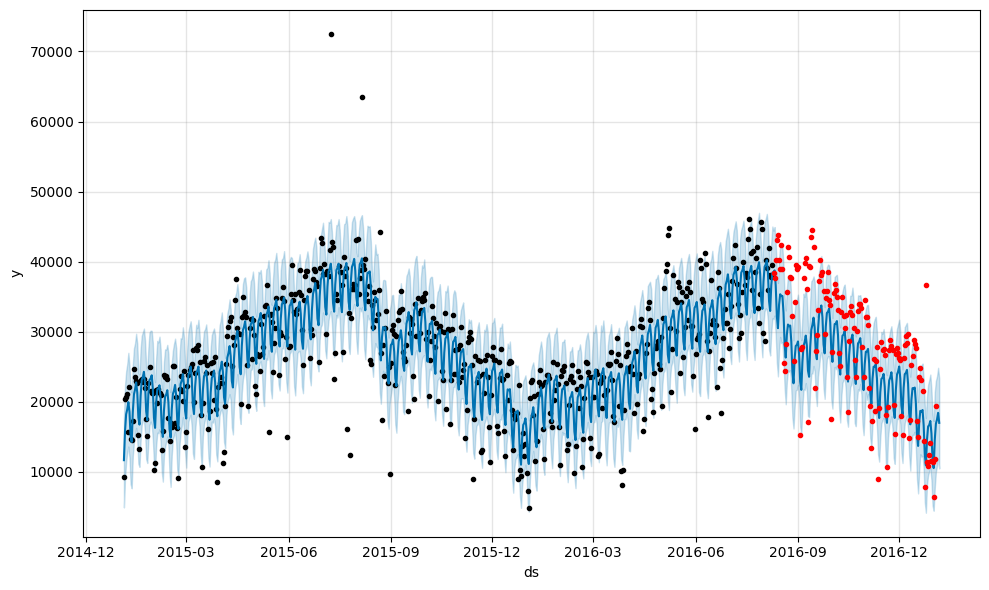

In [ ]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

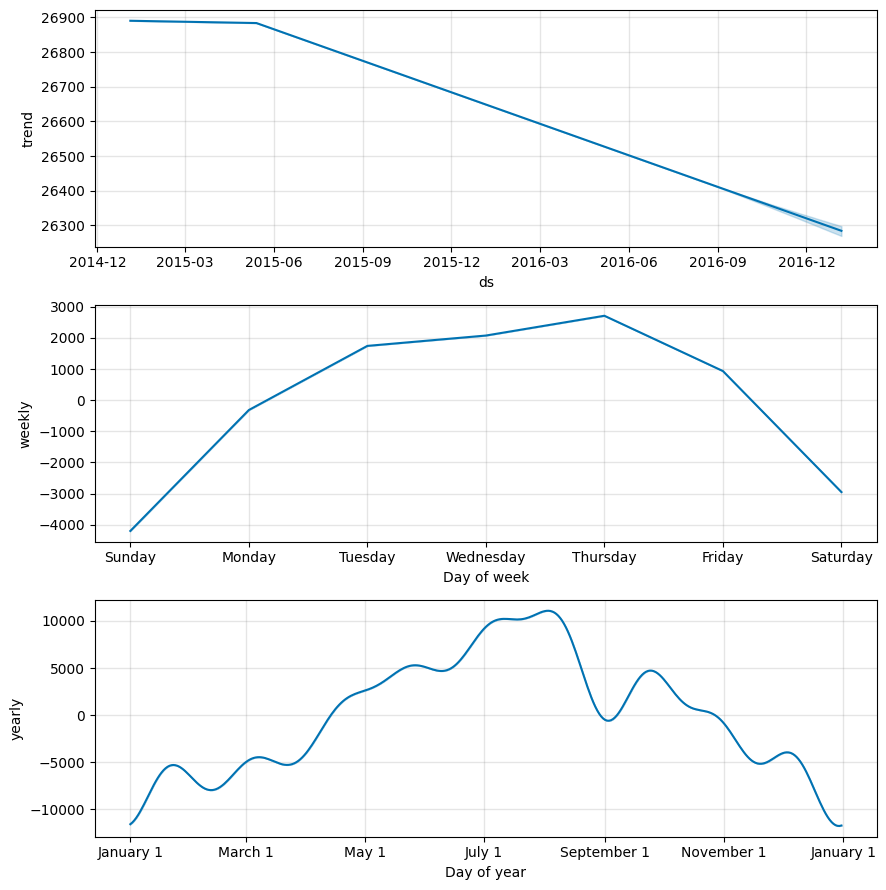

In [ ]:
fig2 = modelo.plot_components(previsao)

In [ ]:
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao,df_teste,on='ds',how='inner')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [ ]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'mse = {mse} , rmse = {rmse}')


mse = 38623883.499975376 , rmse = 6214.8116222437


####Tratando Outliers

In [ ]:
df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
# Obtendo os intervalos de confiança
np.random.seed(4587)
modelo=Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/xvlz0u9f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/o9ah9884.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72130', 'data', 'file=/tmp/tmpo44iwjzg/xvlz0u9f.json', 'init=/tmp/tmpo44iwjzg/o9ah9884.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_modelxxk1ddp2/prophet_model-20240920212404.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:24:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:24:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Removendo os outliers
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [ ]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [ ]:
df_trenio = pd.DataFrame()
df_teste = pd.DataFrame()
# Separando 80% dos dados para treino
df_trenio['ds'] = sem_outliers['ds'][:505]
df_trenio['y'] = sem_outliers['y'][:505]
# Separando 20% dos dados para teste
df_teste['ds'] = df_prophet['ds'][505:]
df_teste['y'] = df_prophet['y'][505:]

In [ ]:
# Realizando a previsão
np.random.seed(4587)
modelo_sem_outliers=Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_trenio)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150,freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/zjlvlpp0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/t5y_ndv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95001', 'data', 'file=/tmp/tmpo44iwjzg/zjlvlpp0.json', 'init=/tmp/tmpo44iwjzg/t5y_ndv9.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_model4lam44xm/prophet_model-20240920212445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:24:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:24:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



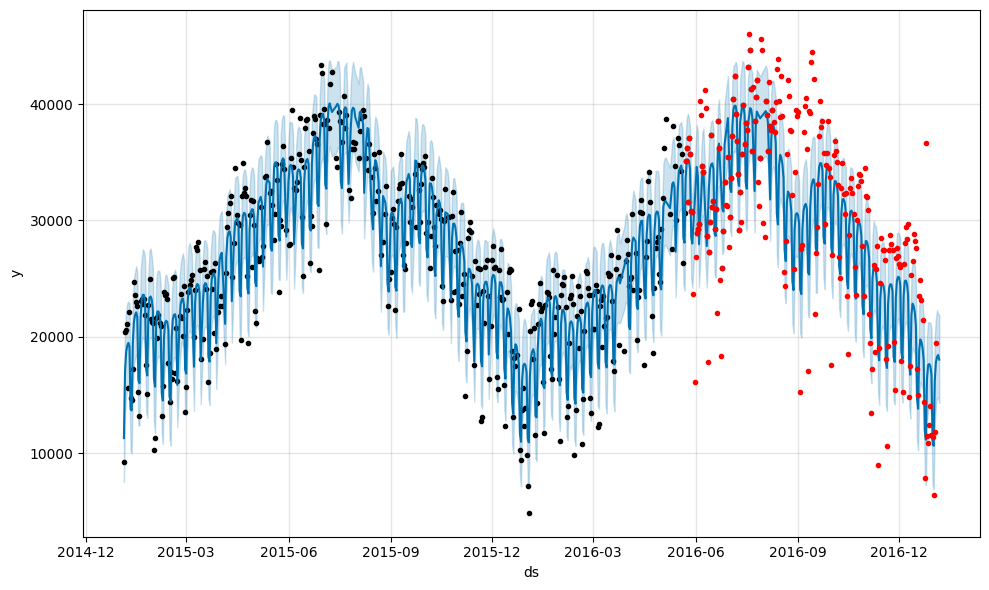

In [ ]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'],df_teste['y'], '.r')

In [ ]:
#comparando resultados da previsão com os dados de teste
df_previsao = previsao[['ds','yhat']]
df_comparacao = pd.merge(df_previsao,df_teste,on='ds')
df_comparacao

,ds,yhat,y
0,2016-05-23,33601.495314,35067
1,2016-05-24,35013.050734,36184
2,2016-05-25,35244.012958,31614
3,2016-05-26,35122.974029,37113
4,2016-05-27,34382.675862,35708
...,...,...,...
196,2016-12-30,16752.064183,11566
197,2016-12-31,11045.380016,11424
198,2017-01-01,10626.497538,6421
199,2017-01-02,16230.512446,11823


In [ ]:
# Calculando o RMSE
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE = {mse} , RMSE = {rmse}')


MSE = 24789416.313169867 , RMSE = 4978.89709807


In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
plot_plotly(modelo, previsao)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [ ]:
plot_components_plotly(modelo, previsao)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



###Aumentando o periodo de previsões

In [ ]:
# Realizando a previsão
np.random.seed(4587)
modelo_sem_outliers=Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_trenio)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365,freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/zy1ib4ia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpo44iwjzg/d60xo6kv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63395', 'data', 'file=/tmp/tmpo44iwjzg/zy1ib4ia.json', 'init=/tmp/tmpo44iwjzg/d60xo6kv.json', 'output', 'file=/tmp/tmpo44iwjzg/prophet_modeljogcf2n_/prophet_model-20240920212655.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:26:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:26:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
plot_plotly(modelo_sem_outliers, previsao)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

